In [133]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [134]:
def system(x, y, E):
    f = y[0]
    f_prima = y[1]
    dfdx = f_prima
    df_primadx = x**2 * f - 2 * E * f
    return [dfdx, df_primadx]

In [135]:
x_span = [0, 6] 
x_eval = np.linspace(x_span[0], x_span[1], 100)
Es = np.arange(0.1, 10, 0.001)
condicion = 1
energias_forma_simetrica = []
energias_forma_antisimetrica = []

In [136]:
y_simetrica = [1, 0] 
y_antisimetrica = [0, 1]

In [137]:
for E in Es:
    sol = solve_ivp(system, x_span, y_simetrica, args=(E,), max_step = 0.1)
    if np.sqrt(abs(sol.y[0, -1])**2 + abs(sol.y[1, -1])**2) < condicion:
        if len(energias_forma_simetrica) == 0:
            energias_forma_simetrica.append(E)
        else:
            if len(energias_forma_simetrica) < 5:
                si = True
                for numero in energias_forma_simetrica:
                    if numero - 0.9 <= E and E <= numero + 0.9:
                        si = False
                if si:
                    energias_forma_simetrica.append(E)
for E in Es:
    sol = solve_ivp(system, x_span, y_antisimetrica, args=(E,), max_step = 0.1)
    if np.sqrt(abs(sol.y[0, -1])**2 + abs(sol.y[1, -1])**2) < condicion:
        if len(energias_forma_antisimetrica) == 0:
            energias_forma_antisimetrica.append(E)
        else:
            if len(energias_forma_antisimetrica) < 5:
                si = True
                for numero in energias_forma_antisimetrica:
                    if numero - 0.9 <= E and E <= numero + 0.9:
                        si = False
                if si:
                    energias_forma_antisimetrica.append(E)

print(f"Las primeras cinco energías permitidas encontradas para la forma simétrica son: {energias_forma_simetrica}")
print(f"Las primeras cinco energías permitidas encontradas para la forma antisimétrica son: {energias_forma_antisimetrica}")

Las primeras cinco energías permitidas encontradas para la forma simétrica son: [0.5000000000000003, 2.500000000000002, 4.5000000000000036, 6.500000000000005, 8.500000000000007]
Las primeras cinco energías permitidas encontradas para la forma antisimétrica son: [1.5000000000000013, 3.500000000000003, 5.500000000000004, 7.499000000000006, 9.492000000000008]


2).

In [138]:
import sympy as sp

miu =  39.4234021
alpha = 1.09778201 * 10**8 



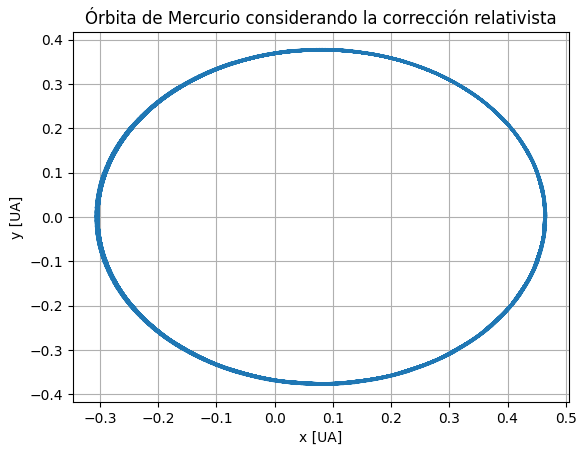

In [139]:
import numpy as np
from scipy.integrate import solve_ivp

miu = 39.4234021
alpha = 1.09778201e-8 
a = 0.38709893  
e = 0.20563069


x0 = a * (1 + e)
y0 = 0
vx0 = 0
vy0 = np.sqrt((miu / a) * ((1 - e) / (1 + e)))

def system(t, y):
    x, y, vx, vy = y
    r = np.sqrt(x**2 + y**2)
    ax = -miu * (1 + alpha / r**2) * x / r**3
    ay = -miu * (1 + alpha / r**2) * y / r**3
    return [vx, vy, ax, ay]


t_span = (0., 10.)
y0 = [x0, y0, vx0, vy0]


sol = solve_ivp(system, t_span, y0, max_step = 0.01)


x_sol = sol.y[0]
y_sol = sol.y[1]


import matplotlib.pyplot as plt

plt.plot(x_sol, y_sol)
plt.xlabel('x [UA]')
plt.ylabel('y [UA]')
plt.title('Órbita de Mercurio considerando la corrección relativista')
plt.grid(True)
plt.show()

In [140]:
def evento(t,y):
    x, y, vx, vy = y
    return x*vx + y*vy

sol = solve_ivp(system, t_span, y0, max_step = 0.01, events=[evento])

#print(sol.t_events[0])
#print(sol.y_events[0])

angulos = []
for info in sol.y_events[0]:
    angulo = np.arctan2(info[1],info[0])
    angulos.append(angulo)

print(angulos)

angulos_simplificados = []

for angulo in angulos:
    if np.abs(angulo) > 3*np.pi/2:
        angulos_simplificados.append(np.abs(angulo)-2*np.pi)
    elif np.abs(angulo) > np.pi/2:
        angulos_simplificados.append(np.abs(angulo)-np.pi)

print(angulos_simplificados)


'''
i = 0
ceros = []
for x in sol.y[0]:
    if sol.y[0][i]*sol.y[2][i] + sol.y[1][i]*sol.y[3][i] == 0: # exactamente igual a 0 o cerca?
        ceros.append((sol.y[0][i], sol.y[1][i], sol.y[2][i], sol.y[3][i]))
    i += 1

print(ceros)'''

[0.0, -3.141436751639412, 0.00031979296364209386, -3.1411002601797255, 0.0006393766763079745, -3.14077130462267, 0.0009590880371180189, -3.140451615451489, 0.001279005218233067, -3.1401390669394686, 0.0015991679006103709, -3.1398298218073006, 0.001919571893867437, -3.1395201858656914, 0.0022401660492453812, -3.1392079003474143, 0.0025608508183648693, -3.1388927620601415, 0.0028814780309313194, -3.138576096185285, 0.0032019102780948363, -3.138248955235715, 0.0035222279332933317, -3.137914548709907, 0.003842506077809504, -3.137580252980812, 0.004162811751489495, -3.137250230695508, 0.004483202861460969, -3.136926001079427, 0.004803724158650464, -3.1366071968662173, 0.005124404994136181, -3.136292343293472, 0.0054452583903331015, -3.135979546605127, 0.0057662810800976445, -3.1356670275034686, 0.006087454256243922, -3.135353474466891, 0.0064087448418509605, -3.1350382212773282, 0.006730107141899076, -3.1347212728076346, 0.007051484772511221, -3.134403214337041, 0.007372812789372884, -3.134

'\ni = 0\nceros = []\nfor x in sol.y[0]:\n    if sol.y[0][i]*sol.y[2][i] + sol.y[1][i]*sol.y[3][i] == 0: # exactamente igual a 0 o cerca?\n        ceros.append((sol.y[0][i], sol.y[1][i], sol.y[2][i], sol.y[3][i]))\n    i += 1\n\nprint(ceros)'